In [21]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
dir_data='./EDA Kernel Density Estimation_HW_016/'
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: ./EDA Kernel Density Estimation_HW_016/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
for col in app_train.columns:
    print(col)

SK_ID_CURR
TARGET
NAME_CONTRACT_TYPE
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
CNT_CHILDREN
AMT_INCOME_TOTAL
AMT_CREDIT
AMT_ANNUITY
AMT_GOODS_PRICE
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
REGION_POPULATION_RELATIVE
DAYS_BIRTH
DAYS_EMPLOYED
DAYS_REGISTRATION
DAYS_ID_PUBLISH
OWN_CAR_AGE
FLAG_MOBIL
FLAG_EMP_PHONE
FLAG_WORK_PHONE
FLAG_CONT_MOBILE
FLAG_PHONE
FLAG_EMAIL
OCCUPATION_TYPE
CNT_FAM_MEMBERS
REGION_RATING_CLIENT
REGION_RATING_CLIENT_W_CITY
WEEKDAY_APPR_PROCESS_START
HOUR_APPR_PROCESS_START
REG_REGION_NOT_LIVE_REGION
REG_REGION_NOT_WORK_REGION
LIVE_REGION_NOT_WORK_REGION
REG_CITY_NOT_LIVE_CITY
REG_CITY_NOT_WORK_CITY
LIVE_CITY_NOT_WORK_CITY
ORGANIZATION_TYPE
EXT_SOURCE_1
EXT_SOURCE_2
EXT_SOURCE_3
APARTMENTS_AVG
BASEMENTAREA_AVG
YEARS_BEGINEXPLUATATION_AVG
YEARS_BUILD_AVG
COMMONAREA_AVG
ELEVATORS_AVG
ENTRANCES_AVG
FLOORSMAX_AVG
FLOORSMIN_AVG
LANDAREA_AVG
LIVINGAPARTMENTS_AVG
LIVINGAREA_AVG
NONLIVINGAPARTMENTS_AVG
NONLIVINGAREA_AVG
APART

In [11]:
app_train['DAYS_EMPLOYED']=abs(app_train['DAYS_EMPLOYED'])


In [15]:
emp_data= app_train[['TARGET','DAYS_EMPLOYED']]
emp_data['YEARS_EMP']=emp_data['DAYS_EMPLOYED']/365

# 顯示不同組的數量
print(emp_data['YEARS_EMP'].value_counts())
emp_data.head()

1000.665753    55374
0.547945         156
0.613699         152
0.630137         151
0.545205         151
               ...  
27.465753          1
38.758904          1
32.326027          1
32.400000          1
30.619178          1
Name: YEARS_EMP, Length: 12574, dtype: int64


<ipython-input-15-465157962ed3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emp_data['YEARS_EMP']=emp_data['DAYS_EMPLOYED']/365


,TARGET,DAYS_EMPLOYED,YEARS_EMP
0,1,637,1.745205
1,0,1188,3.254795
2,0,225,0.616438
3,0,3039,8.326027
4,0,3038,8.323288


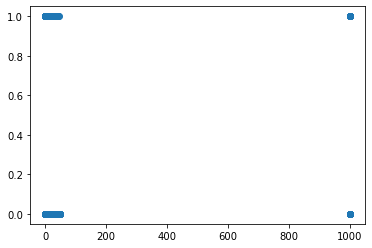

In [24]:
x = emp_data['YEARS_EMP']
y = emp_data['TARGET']
plt.scatter(x, y)

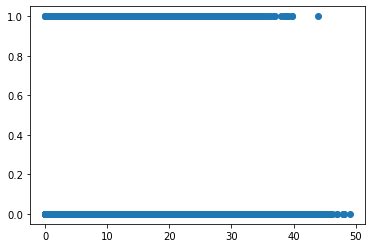

In [32]:
emp_data_trim=emp_data[emp_data['YEARS_EMP']<200]
x = emp_data_trim['YEARS_EMP']
y = emp_data_trim['TARGET']
plt.scatter(x, y)

In [19]:
emp_data= app_train[['TARGET','DAYS_EMPLOYED']]
emp_data['YEARS_EMP']=emp_data['DAYS_EMPLOYED']/365
emp_data['EYEARS_BINNED'] = pd.qcut(emp_data['YEARS_EMP'], 5) 

# 顯示不同組的數量
print(emp_data['EYEARS_BINNED'].value_counts())
emp_data.head()

(-0.001, 2.052]       61569
(4.375, 8.307]        61507
(25.173, 1000.666]    61502
(8.307, 25.173]       61493
(2.052, 4.375]        61440
Name: EYEARS_BINNED, dtype: int64


<ipython-input-19-f1f11dcc2d7a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emp_data['YEARS_EMP']=emp_data['DAYS_EMPLOYED']/365
<ipython-input-19-f1f11dcc2d7a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emp_data['EYEARS_BINNED'] = pd.qcut(emp_data['YEARS_EMP'], 5)


,TARGET,DAYS_EMPLOYED,YEARS_EMP,EYEARS_BINNED
0,1,637,1.745205,"(-0.001, 2.052]"
1,0,1188,3.254795,"(2.052, 4.375]"
2,0,225,0.616438,"(-0.001, 2.052]"
3,0,3039,8.326027,"(8.307, 25.173]"
4,0,3038,8.323288,"(8.307, 25.173]"


In [26]:
eage_groups  = emp_data.groupby('EYEARS_BINNED').mean()
eage_groups

,TARGET,DAYS_EMPLOYED,YEARS_EMP
EYEARS_BINNED,,,
"(-0.001, 2.052]",0.111907,400.754162,1.097957
"(2.052, 4.375]",0.102458,1146.279346,3.140491
"(4.375, 8.307]",0.080088,2243.335734,6.146125
"(8.307, 25.173]",0.056901,4863.367619,13.324295
"(25.173, 1000.666]",0.052275,329972.323355,904.033763


/Users/hywang/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


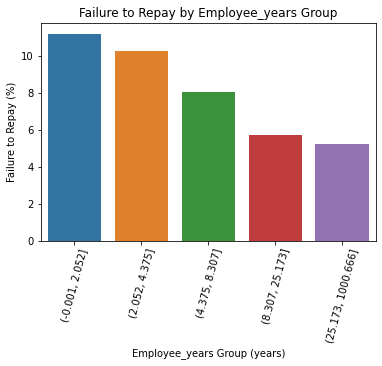

In [29]:
px = eage_groups.index.astype(str)
py = eage_groups['TARGET']*100
sns.barplot(px, py)

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Employee_years Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Employee_years Group');

/Users/hywang/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/hywang/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/hywang/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

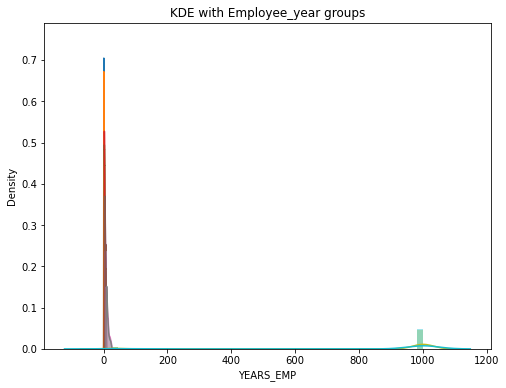

In [23]:
eyear_group_sorted = emp_data['EYEARS_BINNED'].value_counts().index.categories

plt.figure(figsize=(8,6))
for i in range(len(eyear_group_sorted)):
    sns.distplot(emp_data.loc[(emp_data['EYEARS_BINNED'] == eyear_group_sorted[i]) & \
                              (emp_data['TARGET'] == 0), 'YEARS_EMP'], label = str(eyear_group_sorted[i]))
    
    sns.distplot(emp_data.loc[(emp_data['EYEARS_BINNED'] == eyear_group_sorted[i]) & \
                              (emp_data['TARGET'] == 1), 'YEARS_EMP'], label = str(eyear_group_sorted[i]))
plt.title('KDE with Employee_year groups')
plt.show()

In [33]:
emp_data_trim.head()

,TARGET,DAYS_EMPLOYED,YEARS_EMP,EYEARS_BINNED
0,1,637,1.745205,"(-0.001, 2.052]"
1,0,1188,3.254795,"(2.052, 4.375]"
2,0,225,0.616438,"(-0.001, 2.052]"
3,0,3039,8.326027,"(8.307, 25.173]"
4,0,3038,8.323288,"(8.307, 25.173]"


In [34]:
emp_data_trim['EYEARS_BINNED'] = pd.cut(emp_data_trim['YEARS_EMP'], 5) 

# 顯示不同組的數量
print(emp_data_trim['EYEARS_BINNED'].value_counts())
emp_data_trim.head()

(-0.0491, 9.815]    199580
(9.815, 19.63]       39314
(19.63, 29.444]       9950
(29.444, 39.259]      2982
(39.259, 49.074]       311
Name: EYEARS_BINNED, dtype: int64


<ipython-input-34-8d7b35b1b519>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emp_data_trim['EYEARS_BINNED'] = pd.cut(emp_data_trim['YEARS_EMP'], 5)


,TARGET,DAYS_EMPLOYED,YEARS_EMP,EYEARS_BINNED
0,1,637,1.745205,"(-0.0491, 9.815]"
1,0,1188,3.254795,"(-0.0491, 9.815]"
2,0,225,0.616438,"(-0.0491, 9.815]"
3,0,3039,8.326027,"(-0.0491, 9.815]"
4,0,3038,8.323288,"(-0.0491, 9.815]"


/Users/hywang/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


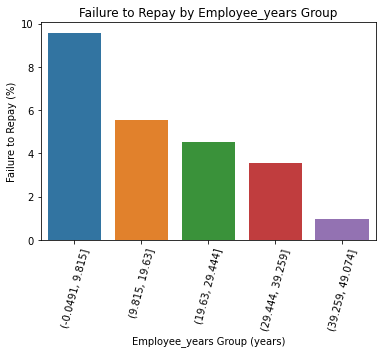

In [35]:
eage_groups  = emp_data_trim.groupby('EYEARS_BINNED').mean()
px = eage_groups.index.astype(str)
py = eage_groups['TARGET']*100
sns.barplot(px, py)

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Employee_years Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Employee_years Group');